In [ ]:
# importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Creating DATAFRAME from  swiggy_data
df = pd.read_excel('/content/swiggy_data_main.xlsx')

In [ ]:
df.head()

,id,res_link,res_name,rating,cusines,location,delivery_review_number,dish_category,dish_name,price,veg_status,price_for_two,price_for_one
0,1,https://www.swiggy.com/restaurants/1522-the-pu...,1522 The Pub - Residency Road,4.3,"Chinese, Coastal",Residency Road,500,Recommended,French Chicken,310,NonVeg,600,300
1,1,https://www.swiggy.com/restaurants/1522-the-pu...,1522 The Pub - Residency Road,4.3,"Chinese, Coastal",Residency Road,500,Recommended,Mutton Nalli,590,NonVeg,600,300
2,1,https://www.swiggy.com/restaurants/1522-the-pu...,1522 The Pub - Residency Road,4.3,"Chinese, Coastal",Residency Road,500,Recommended,Old Style Chilli Chicken,310,NonVeg,600,300
3,1,https://www.swiggy.com/restaurants/1522-the-pu...,1522 The Pub - Residency Road,4.3,"Chinese, Coastal",Residency Road,500,Recommended,Devils Chicken,330,NonVeg,600,300
4,1,https://www.swiggy.com/restaurants/1522-the-pu...,1522 The Pub - Residency Road,4.3,"Chinese, Coastal",Residency Road,500,Recommended,Tandoori Chicken,390,NonVeg,600,300


In [ ]:
# checking no_of_rows and columns
df.shape

(107867, 13)

In [ ]:
# checking duplicates rows in DataFrame
df.duplicated().sum()

0

In [ ]:
# checking Null Values in DataFrame
df.isnull().sum()

id                        0
res_link                  0
res_name                  0
rating                    0
cusines                   0
location                  0
delivery_review_number    0
dish_category             0
dish_name                 0
price                     0
veg_status                0
price_for_two             0
price_for_one             0
dtype: int64

In [ ]:
df.columns

Index(['id', 'res_link', 'res_name', 'rating', 'cusines', 'location',
       'delivery_review_number', 'dish_category', 'dish_name', 'price',
       'veg_status', 'price_for_two', 'price_for_one'],
      dtype='object')

In [ ]:
df.drop('dish_category',axis = 1,inplace = True )

In [ ]:
# Renaming column name
df.rename(columns={'veg_status':'dish_category'}, inplace=True)

In [ ]:
# checking dish category counts
df['dish_category'].value_counts()

Veg       77213
NonVeg    30654
Name: dish_category, dtype: int64

In [ ]:
df['dish_name'].nunique()

61033

In [ ]:
# Droping columns that are not required for model creation
df.drop(['dish_name','id','res_link','price_for_two','delivery_review_number','dish_category'],axis = 1,inplace = True )


In [ ]:
df.head(3)

,res_name,rating,cusines,location,price,price_for_one
0,1522 The Pub - Residency Road,4.3,"Chinese, Coastal",Residency Road,310,300
1,1522 The Pub - Residency Road,4.3,"Chinese, Coastal",Residency Road,590,300
2,1522 The Pub - Residency Road,4.3,"Chinese, Coastal",Residency Road,310,300


In [ ]:
# checking all the unique values of cusines column
df['cusines'].unique()

array(['Chinese, Coastal', 'Juices, Beverages', 'Fast Food, Snacks',
       'Beverages, Snacks', 'Chinese, North Indian', 'Snacks, Indian',
       'Indian, Snacks', 'South Indian, North Indian', 'Biryani, Indian',
       'Mughlai, North Indian', 'Indian', 'Indian, Chaat',
       'Biryani, South Indian', 'Beverages', 'Chinese, Biryani',
       'North Indian, Snacks', 'Chinese, Indian', 'Arabian, Tandoor',
       'Arabian', 'Biryani, Mughlai', 'Kebabs, Indian', 'Bakery, Snacks',
       'Indian, Mughlai', 'Biryani, North Indian', 'Biryani', 'Desserts',
       'Chinese, Tibetan', 'South Indian, Snacks', 'South Indian',
       'Biryani, Kebabs', 'Bakery, Desserts', 'Ice Cream',
       'North Indian, Beverages', 'North Indian', 'Biryani, Andhra',
       'Sweets, Chaat', 'Sweets, North Indian', 'North Indian, Chinese',
       'Andhra, Biryani', 'Andhra, Chettinad', 'Biryani, Chinese',
       'Chettinad, Thalis', 'Fast Food, Burgers', 'North Indian, Punjabi',
       'Punjabi, North Indian', 'C

In [ ]:
# As per above unique values find out that some below mentioned  dish name also there in cusines values

In [ ]:
drop_cusines=['Juices', 'Fast Food', 'Beverages', 'Snacks','Kebabs', 'Bakery','Rolls & Wraps',
              'Desserts','Waffle','Biryani','Combo','Grill','Barbecue', 'Home Food','Ice Cream Cakes'
       'Pastas','Ice Cream', 'Sweets','Chaat', 'Burgers','Healthy Food', 'Paan', 'Tex-Mex', 'Sushi'
              'Pizzas', 'Cafe','Tandoor','Thalis', 'Salads', 'Seafood', 'Street Food','Cakes and Pastries']

In [ ]:
# Creating a function to consider only 1st ',' separated value
def temp(val):
  z = val.split(',')
  if len(z)==2:
    return z[0]
  else:
    return val

In [ ]:
# Applying temp function
df['cusines'] = df['cusines'].apply(temp)

In [ ]:
# replacing dish name from cusines column
for cuisine_to_drop in drop_cusines:
    df['cusines'] = df['cusines'].str.replace(cuisine_to_drop, '', regex=True)

In [ ]:
df['cusines'].unique()

array(['Chinese', '', 'Indian', 'South Indian', 'Mughlai', 'North Indian',
       'Arabian', 'Andhra', 'Chettinad', 'Punjabi', 'Continental',
       'Asian', 'Assamese', 'Japanese', 'Lebanese', 'Bengali', 'Italian',
       'Pizzas', 'American', 'Mexican', 'Maharashtrian', 'European',
       'Middle Eastern', 'Coastal', 'Mangalorean', 'Mediterranean',
       'Kerala', 'Pan-Asian', 'Rajasthani', 'Turkish', 'Portuguese',
       'Thai', 'Italian-American', 'Parsi', 'Gujarati', 'Pastas', 'Jain',
       'Tibetan'], dtype=object)

In [ ]:
df['cusines']=df['cusines'].replace('','Unkonwn')

In [ ]:
df.columns

Index(['res_name', 'rating', 'cusines', 'location', 'price', 'price_for_one'], dtype='object')

In [ ]:
# Making numerical column and categoryical column from Dataframe
numerical_col = []
categorical_col = []

for column in df.columns:
  try:
    float(df[column].mode()[0])
    numerical_col.append(column)
  except:
    categorical_col.append(column)

In [ ]:
# Checking all the unique values and unique value counts  of categorical columns
for column in categorical_col :
  print(column)
  print(df[column].sort_values().unique())
  print(df[column].nunique())
  print()


res_name
['1522 The Pub - Residency Road' '1992 Chats Space' '34 Chowringhee Lane'
 ... 'cheesy crazy cafe' 'kolkata King' 'vaibhav biriyani']
1390

cusines
['American' 'Andhra' 'Arabian' 'Asian' 'Assamese' 'Bengali' 'Chettinad'
 'Chinese' 'Coastal' 'Continental' 'European' 'Gujarati' 'Indian'
 'Italian' 'Italian-American' 'Jain' 'Japanese' 'Kerala' 'Lebanese'
 'Maharashtrian' 'Mangalorean' 'Mediterranean' 'Mexican' 'Middle Eastern'
 'Mughlai' 'North Indian' 'Pan-Asian' 'Parsi' 'Pastas' 'Pizzas'
 'Portuguese' 'Punjabi' 'Rajasthani' 'South Indian' 'Thai' 'Tibetan'
 'Turkish' 'Unkonwn']
38

location
['04th block' 'AUSTIN TOWN' 'Adugodi' 'Ashok Nagar' 'Audgodi'
 'Austin Town' 'Azad Nagar' 'BASAVANAGUDI' 'BRIGADE ROAD' 'BTM'
 'BTM Layout' 'BTM layout' 'Banashankari' 'Bannerghatta Main Road'
 'Basavanagudi' 'Basavangudi' 'Basaveshwar Nagar' 'Basaveshwara Nagar'
 'Basaveshwaranagar' 'Bhawani nagar' 'Binnipete' 'Brigade Rd'
 'Brigade Road' 'Btm' 'Btm Layout' 'Bull Temple Road' 'Central Bangal

<ipython-input-109-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

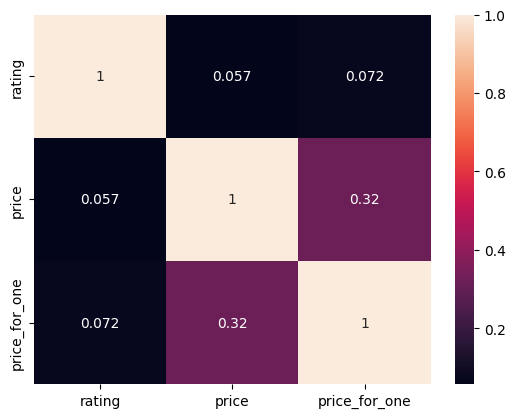

In [ ]:
sns.heatmap(df.corr(), annot = True)

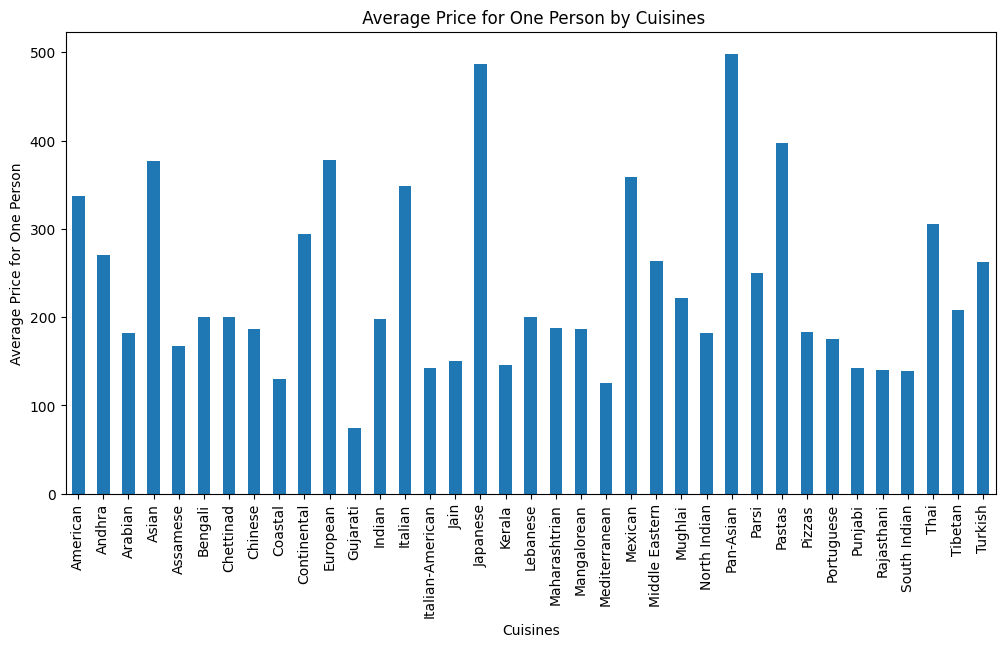

In [ ]:
# Filter out rows where 'cusines' is 'unknown'
filtered_df = df[df['cusines'] != 'Unkonwn']

# Perform the groupby operation and count the 'res_name' for each 'cusines'
cusines_counts = filtered_df.groupby('cusines')['price_for_one'].mean()

# Create a bar plot
cusines_counts.plot(kind='bar', figsize=(12, 6))

# Add labels and title
plt.xlabel('Cuisines')
plt.ylabel('Average Price for One Person')
plt.title(' Average Price for One Person by Cuisines')

# Show the plot
plt.show()

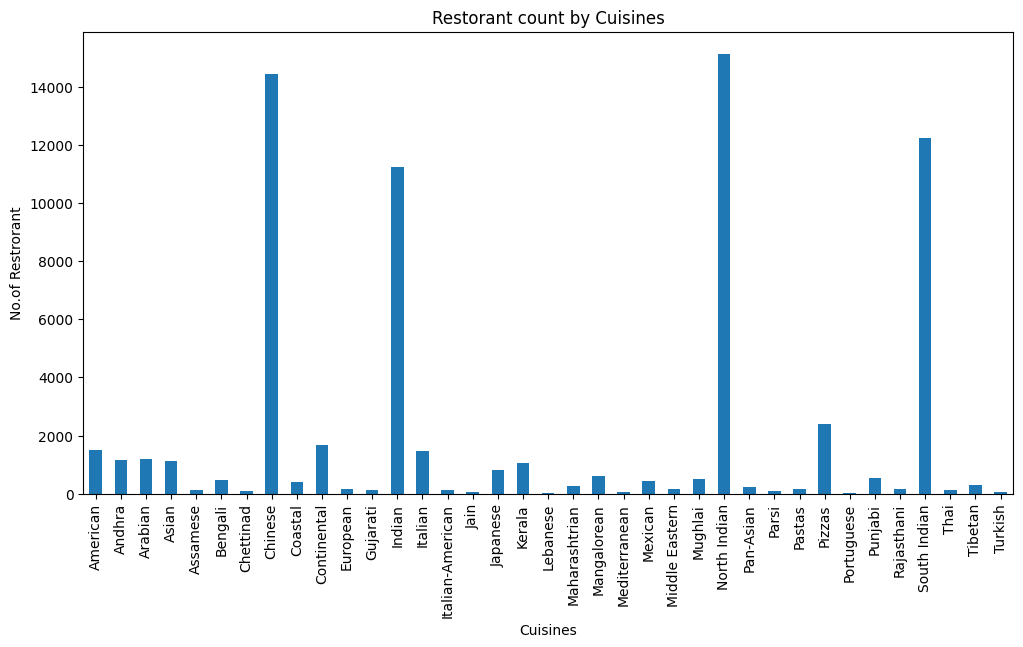

In [ ]:
# Filter out rows where 'cusines' is 'unknown'
filtered_df = df[df['cusines'] != 'Unkonwn']

# Perform the groupby operation and count the 'res_name' for each 'cusines'
cusines_counts = filtered_df.groupby('cusines')['res_name'].count()

# Create a bar plot
cusines_counts.plot(kind='bar', figsize=(12, 6))

# Add labels and title
plt.xlabel('Cuisines')
plt.ylabel('No.of Restrorant')
plt.title('Restorant count by Cuisines')

# Show the plot
plt.show()

##Linear Regression Model for Price Prediction


---



In [ ]:
df

,res_name,rating,cusines,location,price,price_for_one
0,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,310,300
1,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,590,300
2,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,310,300
3,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,330,300
4,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,390,300
...,...,...,...,...,...,...
107862,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,499,200
107863,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,250,200
107864,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,699,200
107865,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,130,200


In [ ]:
# Creating a copy of the original DataFrame
df1 = df.copy()

for column in categorical_col:
    if df[column].nunique() >= 135:
        df1 = df1.drop(column, axis=1)

In [ ]:
df1

,rating,cusines,location,price,price_for_one
0,4.3,Chinese,Residency Road,310,300
1,4.3,Chinese,Residency Road,590,300
2,4.3,Chinese,Residency Road,310,300
3,4.3,Chinese,Residency Road,330,300
4,4.3,Chinese,Residency Road,390,300
...,...,...,...,...,...
107862,4.3,Unkonwn,Church Street,499,200
107863,4.3,Unkonwn,Church Street,250,200
107864,4.3,Unkonwn,Church Street,699,200
107865,4.3,Unkonwn,Church Street,130,200


In [ ]:
# defining X and Y for model Creation
x = df1.drop('price_for_one',axis=1)
y = df1['price_for_one']

In [ ]:
df1.columns

Index(['rating', 'cusines', 'location', 'price', 'price_for_one'], dtype='object')

In [ ]:
# Checking Data Types of each column
df1.dtypes

rating           float64
cusines           object
location          object
price              int64
price_for_one      int64
dtype: object

<ipython-input-31-3fac90d2e2f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot = True)


<Axes: >

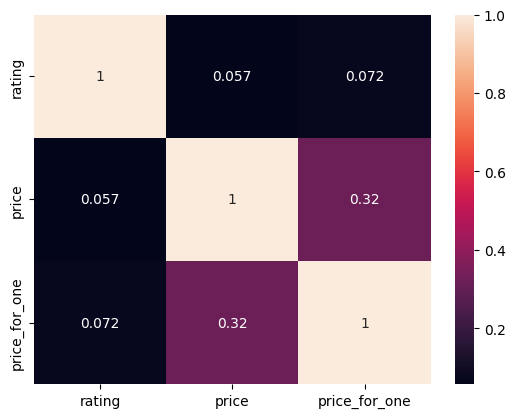

In [ ]:
# creating Heatmap for checking Multicollinearity in columns
sns.heatmap(df1.corr(),annot = True)

In [ ]:
# importing Laibrary for scaling
from  sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
# fitting the data for scaling
for i in df1:
  if (df1[i].dtypes !='O') and i != 'price_for_one':
    df1[i] = sc.fit_transform(df1[[i]])

In [ ]:
df1

,rating,cusines,location,price,price_for_one
0,0.431623,Chinese,Residency Road,0.417502,300
1,0.431623,Chinese,Residency Road,1.721655,300
2,0.431623,Chinese,Residency Road,0.417502,300
3,0.431623,Chinese,Residency Road,0.510656,300
4,0.431623,Chinese,Residency Road,0.790117,300
...,...,...,...,...,...
107862,0.431623,Unkonwn,Church Street,1.297805,200
107863,0.431623,Unkonwn,Church Street,0.138040,200
107864,0.431623,Unkonwn,Church Street,2.229343,200
107865,0.431623,Unkonwn,Church Street,-0.420882,200


In [ ]:
# Doing One hot encodig for categoryical columns in Data Frame
x = pd.get_dummies(df1, columns=['location','cusines'], drop_first=True)

In [ ]:
x

,rating,price,price_for_one,location_AUSTIN TOWN,location_Adugodi,location_Ashok Nagar,location_Audgodi,location_Austin Town,location_Azad Nagar,location_BASAVANAGUDI,...,cusines_Pastas,cusines_Pizzas,cusines_Portuguese,cusines_Punjabi,cusines_Rajasthani,cusines_South Indian,cusines_Thai,cusines_Tibetan,cusines_Turkish,cusines_Unkonwn
0,0.431623,0.417502,300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.431623,1.721655,300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.431623,0.417502,300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.431623,0.510656,300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.431623,0.790117,300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107862,0.431623,1.297805,200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
107863,0.431623,0.138040,200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
107864,0.431623,2.229343,200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
107865,0.431623,-0.420882,200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x.shape

(107867, 169)

In [ ]:
# Performing Principal component analysis for dimention reduction
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=169)

In [ ]:
pca

PCA(n_components=169)

In [ ]:
pca1 = pca.fit_transform(x)

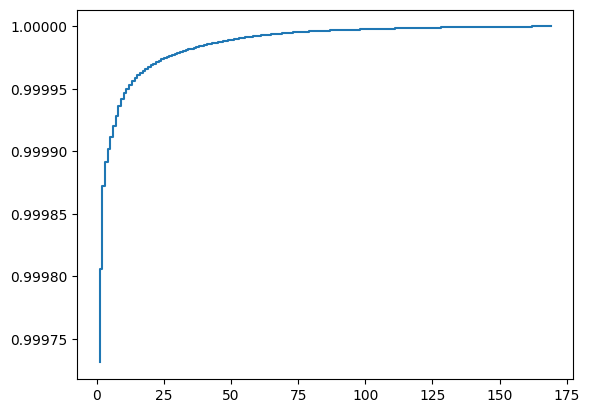

In [ ]:
# Ploting a chart for PCA
plt.step(list(range(1,170)),np.cumsum(pca.explained_variance_ratio_),where = 'pre')

In [ ]:
# as per above chart only 1 compnent is enough for model making so taking only one component
pca2 = PCA(n_components=1)

In [ ]:
pca2.fit(x)

PCA(n_components=1)

In [ ]:
x_ =pca2.transform(x)

In [ ]:
x_ = pd.DataFrame(x_)

In [ ]:
x_

,0
0,115.603512
1,115.607075
2,115.603512
3,115.603767
4,115.604530
...,...
107862,15.605646
107863,15.602478
107864,15.608191
107865,15.600951


In [ ]:
# importing Libraries and defining x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_,y, test_size=0.2, random_state=10)

In [ ]:
# importing Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [ ]:
# fitting x_train,y_train for model creation
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predicting Y_pred
y_pred = lr.predict(x_test)


In [ ]:
y_test

6641      200
66079     100
34921     100
100104    150
94103     150
         ... 
94042     150
25472     300
91383     150
68594     250
15156     350
Name: price_for_one, Length: 21574, dtype: int64

In [ ]:
y_pred

array([199.99820677,  99.99989696,  99.99911685, ..., 149.99878941,
       249.99973089, 349.9993194 ])

In [ ]:
# importing metrics for Model Evaluation
from sklearn.metrics import r2_score
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(y_test,y_pred)

7.541965404164349e-06

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.002746263899220967

In [ ]:
r2_score(y_test,y_pred)

0.9999999994289045

##Random Forest classifier for Cusines Prediction



In [ ]:
df

,res_name,rating,cusines,location,price,price_for_one
0,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,310,300
1,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,590,300
2,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,310,300
3,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,330,300
4,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,390,300
...,...,...,...,...,...,...
107862,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,499,200
107863,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,250,200
107864,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,699,200
107865,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,130,200


In [ ]:
# Creating a copy of the original DataFrame
df2= df.copy()

In [ ]:
df2

,res_name,rating,cusines,location,price,price_for_one
0,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,310,300
1,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,590,300
2,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,310,300
3,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,330,300
4,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,390,300
...,...,...,...,...,...,...
107862,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,499,200
107863,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,250,200
107864,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,699,200
107865,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,130,200


In [ ]:
df2 = df2.drop('location',axis = 1)

In [ ]:
df2

,res_name,rating,cusines,price,price_for_one
0,1522 The Pub - Residency Road,4.3,Chinese,310,300
1,1522 The Pub - Residency Road,4.3,Chinese,590,300
2,1522 The Pub - Residency Road,4.3,Chinese,310,300
3,1522 The Pub - Residency Road,4.3,Chinese,330,300
4,1522 The Pub - Residency Road,4.3,Chinese,390,300
...,...,...,...,...,...
107862,Zoroy Luxury Chocolates,4.3,Unkonwn,499,200
107863,Zoroy Luxury Chocolates,4.3,Unkonwn,250,200
107864,Zoroy Luxury Chocolates,4.3,Unkonwn,699,200
107865,Zoroy Luxury Chocolates,4.3,Unkonwn,130,200


In [ ]:
# creating of list of numerical_co and categorical_co
numerical_co = []
categorical_co = []

for column in df2.columns:
  try:
    float(df2[column].mode()[0])
    numerical_co.append(column)
  except:
    categorical_co.append(column)

In [ ]:
numerical_co

['rating', 'price', 'price_for_one']

In [ ]:
categorical_co

['res_name', 'cusines']

In [ ]:
# importing StandardScaler Library for scaling of data
from  sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
# fitting the data for scaling
for i in df2:
  if (df2[i].dtypes !='O'):
    df2[i] = sc.fit_transform(df2[[i]])

In [ ]:
df2

,res_name,rating,cusines,price,price_for_one
0,1522 The Pub - Residency Road,0.431623,Chinese,0.417502,0.995865
1,1522 The Pub - Residency Road,0.431623,Chinese,1.721655,0.995865
2,1522 The Pub - Residency Road,0.431623,Chinese,0.417502,0.995865
3,1522 The Pub - Residency Road,0.431623,Chinese,0.510656,0.995865
4,1522 The Pub - Residency Road,0.431623,Chinese,0.790117,0.995865
...,...,...,...,...,...
107862,Zoroy Luxury Chocolates,0.431623,Unkonwn,1.297805,0.134407
107863,Zoroy Luxury Chocolates,0.431623,Unkonwn,0.138040,0.134407
107864,Zoroy Luxury Chocolates,0.431623,Unkonwn,2.229343,0.134407
107865,Zoroy Luxury Chocolates,0.431623,Unkonwn,-0.420882,0.134407


In [ ]:
# importing Labelencoder for label encoding of cusines column
from sklearn.preprocessing import LabelEncoder

# Creating a label encoder
label_encoder = LabelEncoder()

# Fitting and transforming the 'cuisines' column in the DataFrame
df2['cusines'] = label_encoder.fit_transform(df2['cusines'])

In [ ]:
# doing one hot encoding for dish_category column
df2 = pd.get_dummies(df2, columns=['res_name'], drop_first=True)

In [ ]:
# Defining x and y for logistic regression model
x = df2.drop('cusines',axis =1)
y = df2['cusines']

In [ ]:
x.shape

(107867, 1392)

In [ ]:
# importing model
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()

In [ ]:
# defing x_train, x_test, y_train, y_test for model creation
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 44)

In [ ]:
# fitting x_train,y_train in model
rc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# predicting Y_pred from x_test
y_pred = rc.predict(x_test)

In [ ]:
# printing model evaluation metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       289
           1       1.00      1.00      1.00       225
           2       1.00      1.00      1.00       231
           3       1.00      1.00      1.00       244
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        90
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00      2850
           8       1.00      1.00      1.00        94
           9       1.00      0.99      1.00       310
          10       1.00      1.00      1.00        30
          11       1.00      1.00      1.00        25
          12       1.00      1.00      1.00      2246
          13       1.00      1.00      1.00       259
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00       177
          17       1.00    

In [ ]:
# creating confusion matrix
metrics.confusion_matrix(y_test,y_pred)

array([[ 289,    0,    0, ...,    0,    0,    0],
       [   0,  224,    0, ...,    0,    0,    1],
       [   0,    0,  230, ...,    0,    0,    1],
       ...,
       [   0,    0,    0, ...,   65,    0,    0],
       [   0,    0,    0, ...,    0,   18,    0],
       [   0,    0,    0, ...,    0,    0, 7376]])

In [ ]:
# checking accuracy of Random Forest Model
metrics.accuracy_score(y_test,y_pred)

0.9990266060999351

In [ ]:
metrics.precision_score(y_test,y_pred,average='macro')

0.9999359366769643

In [ ]:
metrics.recall_score(y_test,y_pred,average='macro')

0.9986898232040872

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix,classification_report

# thresholds = [0.3,0.4,0.5,0.6,0.7,0.8]
# models = []
# for threshold in thresholds:
#   lg = LogisticRegression()
#   lg.fit(x_train,y_train)
#   y_prob = lg.predict_proba(x_test)[:,1]
#   y_pred = (y_prob > threshold).astype(int)
#   models.append((lg,threshold,y_pred))

#   cm = confusion_matrix(y_test,y_pred)
#   cr = classification_report(y_test,y_pred)
#   print(f"Threshold : {threshold}")
#   print('Confusion Matrix:')
#   print(cm)
#   print('Classification Report:')
#   print(cr)

## Random Forest Classifier for Location



In [ ]:
df

,res_name,rating,cusines,location,price,price_for_one
0,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,310,300
1,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,590,300
2,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,310,300
3,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,330,300
4,1522 The Pub - Residency Road,4.3,Chinese,Residency Road,390,300
...,...,...,...,...,...,...
107862,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,499,200
107863,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,250,200
107864,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,699,200
107865,Zoroy Luxury Chocolates,4.3,Unkonwn,Church Street,130,200


In [ ]:
df['location'].nunique()

130

In [ ]:
# Creating a copy of the original DataFrame
df3= df.copy()

In [ ]:
 df3 = df3.drop('res_name',axis = 1)

In [ ]:
# creating of list of numerical_co and categorical_co
numerical_column = []
categorical_column = []

for column in df3.columns:
  try:
    float(df3[column].mode()[0])
    numerical_column.append(column)
  except:
    categorical_column.append(column)

In [ ]:
numerical_column

['rating', 'price', 'price_for_one']

In [ ]:
categorical_column

['cusines', 'location']

In [ ]:
# impoting library for scaling of Data
from  sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
# fitting data for scaling
for i in df3:
  if (df3[i].dtypes !='O'):
    df3[i] = sc.fit_transform(df3[[i]])

In [ ]:
df3

,rating,cusines,location,price,price_for_one
0,0.431623,Chinese,Residency Road,0.417502,0.995865
1,0.431623,Chinese,Residency Road,1.721655,0.995865
2,0.431623,Chinese,Residency Road,0.417502,0.995865
3,0.431623,Chinese,Residency Road,0.510656,0.995865
4,0.431623,Chinese,Residency Road,0.790117,0.995865
...,...,...,...,...,...
107862,0.431623,Unkonwn,Church Street,1.297805,0.134407
107863,0.431623,Unkonwn,Church Street,0.138040,0.134407
107864,0.431623,Unkonwn,Church Street,2.229343,0.134407
107865,0.431623,Unkonwn,Church Street,-0.420882,0.134407


In [ ]:
# importing Labelencoder for label encoding of cuisines column
from sklearn.preprocessing import LabelEncoder

# Creating a label encoder
label_encoder = LabelEncoder()

# Fitting and transforming the 'cuisines' column in the DataFrame
df3['cusines'] = label_encoder.fit_transform(df3['cusines'])

In [ ]:
# importing Labelencoder for label encoding of location column
from sklearn.preprocessing import LabelEncoder

# Creating a label encoder
label_encoder = LabelEncoder()

# Fitting and transforming the 'cuisines' column in the DataFrame
df3['location'] = label_encoder.fit_transform(df3['location'])

In [ ]:
df3

,rating,cusines,location,price,price_for_one
0,0.431623,7,90,0.417502,0.995865
1,0.431623,7,90,1.721655,0.995865
2,0.431623,7,90,0.417502,0.995865
3,0.431623,7,90,0.510656,0.995865
4,0.431623,7,90,0.790117,0.995865
...,...,...,...,...,...
107862,0.431623,37,32,1.297805,0.134407
107863,0.431623,37,32,0.138040,0.134407
107864,0.431623,37,32,2.229343,0.134407
107865,0.431623,37,32,-0.420882,0.134407


In [ ]:
# defing x and y for model creation
x=df3.drop('location',axis = 1)
y= df3['location']

In [ ]:
# defining x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 55)

In [ ]:
from matplotlib.cm import ma
# importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()

In [ ]:
x.shape

(107867, 4)

In [ ]:
# fitting x_train,y_train in Random Forest classifier model
rc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# predicting y_pred
y_pred = rc.predict(x_test)

In [ ]:
# printing  evaluation classification_report metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.67      0.80         3
           2       0.91      0.91      0.91       132
           3       0.92      0.94      0.93       720
           4       1.00      0.54      0.70        13
           5       0.00      0.00      0.00         5
           6       0.14      0.33      0.20         3
           7       1.00      1.00      1.00        25
           8       0.43      0.30      0.35        20
           9       0.87      0.88      0.88       132
          10       0.99      0.93      0.96       261
          11       1.00      1.00      1.00        74
          12       0.88      0.88      0.88      2039
          13       1.00      1.00      1.00        18
          14       0.84      0.88      0.86      2552
          15       0.91      0.82      0.87        74
          16       0.58      0.54      0.56        13
          17       0.83    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# calculating accuracy score of model prediction
metrics.accuracy_score(y_test,y_pred)

0.8759154537869658

In [ ]:
metrics.precision_score(y_test,y_pred,average = 'macro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7881532352522392

In [ ]:
metrics.recall_score(y_test,y_pred,average = 'macro')

0.7644288793379252

In [ ]:
metrics.f1_score(y_test,y_pred,average = 'macro')

0.7692562696545182

In [ ]:
# A true positive is an outcome where the model correctly predicts the positive class.
# A true negative is an outcome where the model correctly predicts the negative class.

In [ ]:
# A false positive is an outcome where the model incorrectly predicts the positive class.
# A false negative is an outcome where the model incorrectly predicts the negative class

In [ ]:
# precision_score = tp/tp+fp
# (how many observations our model correctly predicted over the amount of correct and incorrect predictions)

In [ ]:
# recall_score = tp/tp+fn
# (Recall is a measure of how many of the positive cases the classifier correctly predicted,
# over all the positive cases in the data. )
# It is sometimes also referred to as Sensitivity. The formula for it is:

In [ ]:
# f1 score = 2 * precision * recall / precision + recall